In [1]:
import numpy as np
import matplotlib.pyplot as plt
from phlame import simulation

In [2]:
wavelength = 1
lattice_constant = 1
n = 2.04  # refractive index
theta = np.pi/18
diffraction_order = -1  # diffraction order
order_num = 50

# range of thicknesses
d_num = 100
d_range = np.linspace(0, 5, d_num)

# create simulation object
frequency = 2*np.pi/wavelength
sim = simulation.new(frequency, order_num=order_num)
sim.stack.set_lattice_constant(lattice_constant)
sim.stack.define_material('vacuum', 1)
sim.stack.define_material('SiO2', n**2)
sim.stack.define_pattern('grating', ['SiO2', 'vacuum'], [.5, .5])
sim.stack.add_layers(['vacuum', 'grating', 'SiO2'], [None, 1, None])

# s- and p- polarization
tp = np.zeros(d_num)
ts = np.zeros(d_num)

phi = 0
momentum = frequency * np.sin(theta) * np.array([np.cos(phi), np.sin(phi)])
sim.set_momentum(momentum)
for i, d in enumerate(d_range):
    sim.stack.set_layer_thickness(1, d)
    sim.run()
    ts[i] = np.sum(np.abs(sim.get_transmission(polarization_in=[1,0],
                                               order_out=diffraction_order))**2)
    tp[i] = np.sum(np.abs(sim.get_transmission(polarization_in=[0,1],
                                               order_out=diffraction_order))**2)
    
# Compute energy flux along z-direction
k = np.copy(momentum)
k[0] += 2*np.pi/lattice_constant * diffraction_order
k = np.linalg.norm(k)
ts *= np.sqrt(n**2 - k**2/frequency**2) / np.cos(theta)
tp *= np.sqrt(n**2 - k**2/frequency**2) / np.cos(theta)
    
# conical mount
tc = np.zeros(d_num)

phi = np.pi/6
psi = np.pi/4
pol_in = [np.sin(psi), np.cos(psi)]
momentum = frequency * np.sin(theta) * np.array([np.cos(phi), np.sin(phi)])
sim.set_momentum(momentum)
for i, d in enumerate(d_range):
    sim.stack.set_layer_thickness(1, d)
    sim.run()
#     tc[i] = np.abs(sim.get_transmission(polarization_in=pol_in, polarization_out=[1,0],
#                                         order_out=diffraction_order))**2
#     tc[i] = np.abs(sim.get_transmission(polarization_in=pol_in, polarization_out=[0,1],
#                                     order_out=diffraction_order))**2
    tc[i] = np.sum(np.abs(sim.get_transmission(polarization_in=pol_in,
                                               order_out=diffraction_order))**2)

# Compute energy flux along z-direction
k = np.copy(momentum)
k[0] += 2*np.pi/lattice_constant * diffraction_order
k = np.linalg.norm(k)
tc *= np.sqrt(n**2 - k**2/frequency**2) / np.cos(theta)

(0.0, 1.0)

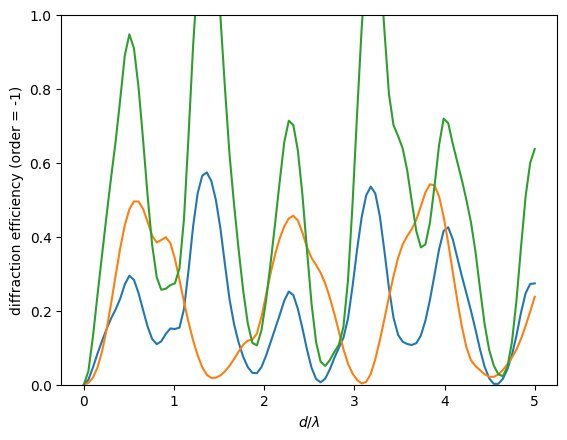

In [3]:
fig, ax = plt.subplots()
ax.plot(d_range, ts);
ax.plot(d_range, tp);
ax.plot(d_range, tc);
ax.set_xlabel("$d/\lambda$");
ax.set_ylabel(f"diffraction efficiency (order = {diffraction_order})");
ax.set_ylim(0, 1)